___

___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>
# RNN Example for Time Series

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.WARN)
tf.keras.utils.set_random_seed(42)  # sets seeds for base-python, numpy and tf
tf.config.experimental.enable_op_determinism() # ensure reproducibility  even on GPU
# plt.style.use('default')

## Data

Info about this data set: https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA

Read in the data set "Miles_Traveled.csv" from the Data folder. Figure out how to set the date to a datetime index columns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/LastExile16/DataScience/main/TimeSeriesDataAnalysis/Data/Miles_Traveled.csv', index_col=0, parse_dates=True)
df.index.freq = 'MS'

In [3]:
df.head()

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


In [4]:
df.columns = ['Value']

**TASK: Plot out the time series**

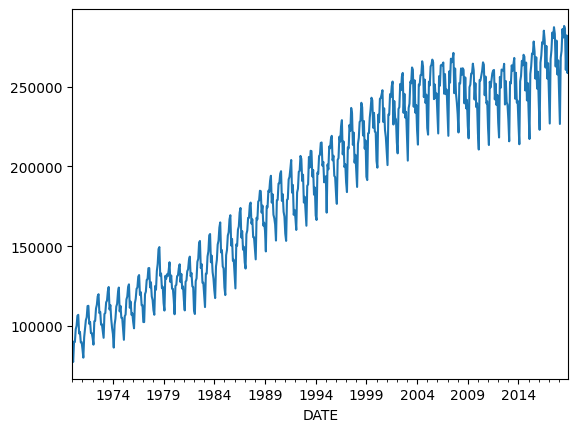

In [5]:
df['Value'].plot();

**TASK: Perform a Seasonal Decomposition on the model and plot out the ETS components**

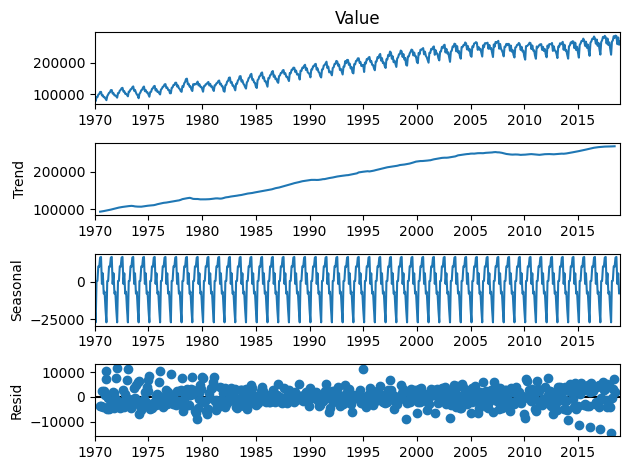

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Value'])
result.plot();

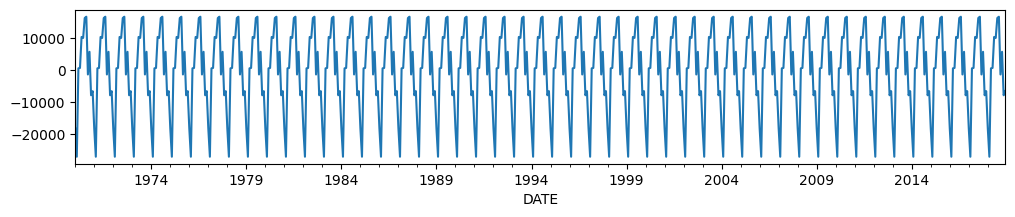

In [7]:
result.seasonal.plot(figsize=(12,2));

## Train Test Split

**TASK: Figure out the length of the data set**

In [8]:
len(df)

588

**TASK: Split the data into a train/test split where the test set is the last 12 months of data.**

In [9]:
train_data = df.iloc[:-12]
test_data = df.iloc[-12:]

In [10]:
len(test_data)

12

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler.fit(train_data)

StandardScaler()

In [13]:
scaled_train = scaler.transform(train_data)
scaled_test = scaler.transform(test_data)

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The n_input is up to you, but at a minimum it should be at least 12.**

In [14]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # type:ignore

In [15]:
n_inputs = 12
target = 1
batch_size = 1
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_inputs, batch_size=batch_size)

In [16]:
len(scaled_train)

576

In [17]:
len(train_generator)
# we have 36 batches, and each batch size is 16 _almost_

564

In [18]:
# What does the first batch look like?
X,y = train_generator[0]

In [19]:
print(f'Given the Array: \n{X.shape}')
print(f'Predict this y: \n {y.shape}')

Given the Array: 
(1, 12, 1)
Predict this y: 
 (1, 1)


### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTAM units you want and a final Dense Layer.**

In [20]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(8, return_sequences=True, input_shape=(n_inputs, target)))
model.add(tf.keras.layers.LSTM(4, return_sequences=True))
model.add(tf.keras.layers.LSTM(2, return_sequences=False))
model.add(tf.keras.layers.Dense(1))

#### Optimizaer and loss functions

In [21]:
custom_optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=custom_optimizer, loss='mse')
# model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 8)             320       
                                                                 
 lstm_1 (LSTM)               (None, 12, 4)             208       
                                                                 
 lstm_2 (LSTM)               (None, 2)                 56        
                                                                 
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 587
Trainable params: 587
Non-trainable params: 0
_________________________________________________________________


**TASK: Fit the model to the generator (it should be a lot of epochs, but do as many as you have the patience for! :)**

In [22]:
# CODE HERE
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)
model.fit(train_generator, epochs=100, callbacks=[early_stopping], verbose=2)
# model.fit(train_generator, epochs=30, verbose=2)

Epoch 1/100
564/564 - 26s - loss: 0.2879 - 26s/epoch - 47ms/step
Epoch 2/100
564/564 - 8s - loss: 0.0855 - 8s/epoch - 13ms/step
Epoch 3/100
564/564 - 7s - loss: 0.0681 - 7s/epoch - 13ms/step
Epoch 4/100
564/564 - 8s - loss: 0.0589 - 8s/epoch - 14ms/step
Epoch 5/100
564/564 - 8s - loss: 0.0457 - 8s/epoch - 14ms/step
Epoch 6/100
564/564 - 7s - loss: 0.0384 - 7s/epoch - 12ms/step
Epoch 7/100
564/564 - 8s - loss: 0.0371 - 8s/epoch - 14ms/step
Epoch 8/100
564/564 - 8s - loss: 0.0290 - 8s/epoch - 14ms/step
Epoch 9/100
564/564 - 7s - loss: 0.0275 - 7s/epoch - 12ms/step
Epoch 10/100
564/564 - 7s - loss: 0.0242 - 7s/epoch - 12ms/step
Epoch 11/100
564/564 - 7s - loss: 0.0247 - 7s/epoch - 13ms/step
Epoch 12/100
564/564 - 8s - loss: 0.0243 - 8s/epoch - 13ms/step
Epoch 13/100
564/564 - 9s - loss: 0.0201 - 9s/epoch - 16ms/step
Epoch 14/100
564/564 - 7s - loss: 0.0203 - 7s/epoch - 13ms/step
Epoch 15/100
564/564 - 7s - loss: 0.0208 - 7s/epoch - 12ms/step
Epoch 16/100
564/564 - 8s - loss: 0.0195 - 8s/e

**TASK: Plot the history of the loss that occured during training.**

In [23]:
model.history.history.keys()

dict_keys(['loss'])

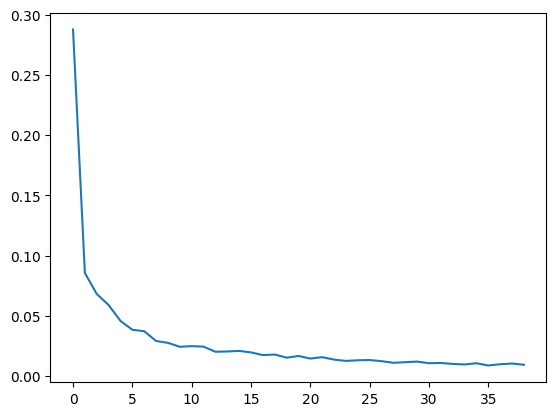

In [24]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

## Evaluate on Test Data

**TASK: Based on your test data and input size, create an appropriate;y sized "first evaluation batch" like we did in the lecture.**

In [25]:
# CODE HERE
first_eval_batch = scaled_train[-n_inputs:]
first_eval_batch

array([[0.97620995],
       [0.66759208],
       [1.37454395],
       [1.47162562],
       [1.66498416],
       [1.60516758],
       [1.72424089],
       [1.65147775],
       [1.29263075],
       [1.57717503],
       [1.20583635],
       [1.36019777]])

In [26]:
print('X.shape', X.shape)
print('first_eval_batch.shape', first_eval_batch.shape)

X.shape (1, 12, 1)
first_eval_batch.shape (12, 1)


In [27]:
one_batch = first_eval_batch.reshape((1, n_inputs, target))
one_batch[0]

array([[0.97620995],
       [0.66759208],
       [1.37454395],
       [1.47162562],
       [1.66498416],
       [1.60516758],
       [1.72424089],
       [1.65147775],
       [1.29263075],
       [1.57717503],
       [1.20583635],
       [1.36019777]])

In [28]:
X[0]

array([[-1.90026957],
       [-1.94804935],
       [-1.72444136],
       [-1.72911262],
       [-1.58886994],
       [-1.55277704],
       [-1.44155914],
       [-1.43146432],
       [-1.63642228],
       [-1.61782473],
       [-1.73387135],
       [-1.72989991]])

**TASK: Generate predictions into the same time stamps as the test set**

In [29]:
test_prediction = []
first_eval_batch = scaled_train[-n_inputs:]
current_batch = first_eval_batch.reshape((1, n_inputs, target))
for i in range(len(test_data)):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 [==============================] - 0s 34ms/step


## Inverse Transformations and Compare

**TASK: Inverse Transform your new forecasted predictions.**

In [30]:
inversed_pred = scaler.inverse_transform(test_prediction)

In [31]:
inversed_pred[:,0]

array([246376.85099775, 236978.03245776, 271115.18436978, 282741.78275717,
       283679.22153315, 283624.84763119, 283757.38912756, 283262.03470413,
       268648.91227556, 278629.80752435, 263317.54437411, 264305.1597684 ])

**TASK: Create a new dataframe that has both the original test values and your predictions for them.**

In [32]:
test_data['Predictions'] = inversed_pred
test_data

<ipython-input-32-201ac4066bd0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predictions'] = inversed_pred


,Value,Predictions
DATE,,
2018-01-01,245695.0,246376.850998
2018-02-01,226660.0,236978.032458
2018-03-01,268480.0,271115.184370
2018-04-01,272475.0,282741.782757
2018-05-01,286164.0,283679.221533
2018-06-01,280877.0,283624.847631
2018-07-01,288145.0,283757.389128
2018-08-01,286608.0,283262.034704
2018-09-01,260595.0,268648.912276


In [33]:
# model.fittedvalues.plot()

**TASK: Plot out the test set against your own predicted values.**

<Axes: xlabel='DATE'>

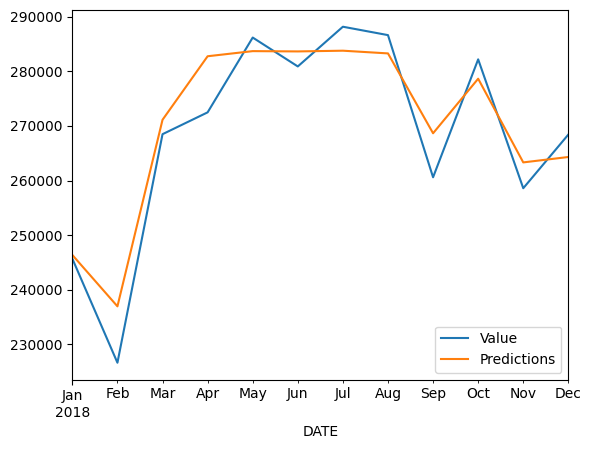

In [34]:
test_data.plot(legend=True)

In [35]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(y_true=test_data['Value'], y_pred=test_data['Predictions'])
print(f'RMSE = {np.sqrt(error)}')
# n_inputs=24, 8 nodes, batchsize=8, StandardScaler, Epochs=100, earlyStopping, RMSE = 27862.104749073133
# n_inputs=24, 150 nodes, batchsize=8, StandardScaler, Epochs=100, earlyStopping, RMSE = 17515.88872211972
# n_inputs=24, 8 nodes, batchsize=4, StandardScaler, Epochs=100, earlyStopping, RMSE = 17104.95750046191
# n_inputs=24, 8 nodes, batchsize=8, MinMaxScaler, Epochs=30, earlyStopping, RMSE = 28870.156838052662
# n_inputs=24, 150 nodes, batchsize=1, MinMaxScaler, Epochs=30, no_earlyStopping, RMSE = 9413.897708972241
# n_inputs=24, 16 nodes, batchsize=1, StandardScaler, Epochs=30, no_earlyStopping, RMSE = 9236.332159245518
# n_inputs=12, 16 nodes, batchsize=1, StandardScaler, Epochs=30, no_earlyStopping, RMSE = 7753.888969901404
# n_inputs=12, 8 nodes, batchsize=1, StandardScaler, Epochs=30, no_earlyStopping, RMSE = 6574.192762625019
# n_inputs=12, 8 nodes, 4 nodes, batchsize=1, StandardScaler, Epochs=100, earlyStopping, RMSE = 8233.308500332412
# n_inputs=12, 8 nodes, 4 nodes, 2 nodes, batchsize=1, StandardScaler, Epochs=100, earlyStopping, RMSE = 5628.054529286243

RMSE = 5628.054529286243


In [36]:
df['Value'].mean()

190420.38095238095

# Saving Models

**TASK: Optional, Save your model!**

In [37]:
# model.save('exerciseLSTM8_12input.h5')